<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Projects/Air%20Quality/Air_Quality_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Air Quality Prediction:
###This project predicts the air quality in BTM Layout Bengaluru, Karnataka using an year worth of pollution data(from 8th october 2021 to 8th october 2022) using LSTM Deep Learning Model.

###1. The following cell deals with the components required to perform one of the most noteworthy part of this project: Automatic download of data from the Pollution Control Board website using the Selenium Package. The components are:
###i. Selenium Package.
###ii. Chromium web-browser
###iii. Chromium Web Driver:This is required to control the chromium web browser automatically.

In [1]:
"""Install the required packages. Note that Google Colab is an Ubuntu Linux Virtual Machine hosted on Google Cloud. Thus we can use 
ubuntu terminal commands to install the required components."""
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [95.2 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages 

###2. The following cell performs the automatic download of the data. A sound will be played to denote the successful completion. In case of any error please run the cell again.
###The website contains drop-down menus,buttons,checkboxes etc. All these have to be appropriately clicked so that we maybe directed to the download page. I manually downloaded the data in the previous project. This time it will be done automatically using the Selenium package which is used for automated testing. It invokes the chromium browser with the specified url(the pollution control board website) and then manipulates all the required html items to download the data.
###Click on the below link to get a video demonstrating the automatic download. Meanwhile you can execute the cell so that you can see the video while the data is being downloaded. To denote the successful end of the process, a sound will be played.
https://youtu.be/5yzo_nwf5Nw

\

###The downloaded file contains data on six pollutants: $PM_{2.5},PM_{10},CO,SO_{2},NO_{2},O_{3}$
###The website may sometimes not respond quickly to our requests and hence an error may occur during the execution

In [4]:
#Will take some time to run(Around 7-8 min). A sound will be played to denote the successful completion
#In case of any error please run the cell again
from IPython.display import Audio
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
try:
  driver.get('https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing/data')
  sleep(60)
#Select From Date
  driver.find_element(By.CLASS_NAME,'wc-date-container').click()
  sleep(3)
  driver.find_element(By.CLASS_NAME,'year-dropdown').click()
  sleep(3)
  driver.find_element(By.ID,'2021').click()
  sleep(3)
  driver.find_element(By.CLASS_NAME,'month-year').click()
  sleep(3)
  driver.find_element(By.ID,'OCT').click()
  sleep(3)
  driver.find_element(By.XPATH,'//*[@id="date"]/angular2-date-picker/div/div[2]/table[2]/tbody/tr[2]/td[6]').click()
  sleep(3)
#Select To Date
  driver.find_element(By.XPATH,'//*[@id="date2"]/angular2-date-picker/div/div[1]').click()
  sleep(3)
  driver.find_element(By.XPATH,'//*[@id="date2"]/angular2-date-picker/div/div[2]/div[3]/div').click()
  sleep(3)
  driver.find_element(By.ID,'2022').click()
  sleep(3)
  driver.find_element(By.XPATH,'//*[@id="date2"]/angular2-date-picker/div/div[2]/div[2]/div').click()
  sleep(3)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[4]/div[2]/div/div/div/angular2-date-picker/div/div[2]/div[4]/span[10]').click()
  sleep(3)
  driver.find_element(By.XPATH,'//*[@id="date2"]/angular2-date-picker/div/div[2]/table[2]/tbody/tr[2]/td[7]').click()
  sleep(3)
#Select State
  driver.find_element(By.CLASS_NAME,'placeholder').click()
  sleep(3)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[1]/div[1]/div/ng-select/select-dropdown/div/div[2]/ul/li[13]').click()
  sleep(3)
#Select City
  driver.find_element(By.CLASS_NAME,'placeholder').click()
  sleep(3)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[1]/div[2]/div/ng-select/select-dropdown/div/div[2]/ul/li[3]').click()
  sleep(3)
#Select Station
  driver.find_element(By.CLASS_NAME,'placeholder').click()
  sleep(3)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[1]/div/ng-select/select-dropdown/div/div[2]/ul/li[1]').click()
  sleep(3)
#Select Parameters/Pollutants
  driver.find_element(By.CLASS_NAME,'c-btn').click()
  sleep(3)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[2]/div/div/multi-select/angular2-multiselect/div/div[2]/div[2]/ul/li[1]').click()
  sleep(2)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[2]/div/div/multi-select/angular2-multiselect/div/div[2]/div[2]/ul/li[2]').click()
  sleep(2)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[2]/div/div/multi-select/angular2-multiselect/div/div[2]/div[2]/ul/li[4]').click()
  sleep(2)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[2]/div/div/multi-select/angular2-multiselect/div/div[2]/div[2]/ul/li[7]').click()
  sleep(2)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[2]/div/div/multi-select/angular2-multiselect/div/div[2]/div[2]/ul/li[8]').click()
  sleep(2)
  driver.find_element(By.XPATH,'/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[2]/div/div/multi-select/angular2-multiselect/div/div[2]/div[2]/ul/li[9]').click()
  sleep(5)
#Click on submit
  driver.find_element(By.CLASS_NAME,'btn.btn-primary').click()
  sleep(60)
#Click on excel file download button
  driver.find_element(By.CLASS_NAME,'btn.btn-success.tooltip-bottom').click()
  sleep(240)
#Close the browser. 
  driver.close()
except:
  print("The website has not responded quickly. Please rerun the cell")
  driver.close()
#Play audio to denote successful end of the download
Audio(url="https://www2.cs.uic.edu/~i101/SoundFiles/StarWars3.wav",autoplay=True)

In [5]:
#This code automatically renames the downloaded xlsx file as 'train.xlsx'. Please rerun the previous cell in case no xlsx file is found.
import os
l=os.listdir()
for i in l:
  if(i.find('xlsx')!=-1):
    os.rename(i,'train.xlsx')
    break
else:
    print("no xlsx file found. Please rerun the previous cell")

###The following cell is responsible for the calculation of the air quality index. The inspiration for the below code has been taken from a paper published by the Central Pollution Control Board whose link is given below:
\
https://app.cpcbccr.com/ccr_docs/FINAL-REPORT_AQI_.pdf

\
###The above file can also be found in my Github repo.
\
https://github.com/TXH2020/MainRepo

\
### I have used six pollutants as mentioned earlier $PM_{2.5},PM_{10},CO,SO_{2},NO_{2},O_{3}$
###This is the system which was developed by Indian Institute of Tropical Meteorology (IITM), Pune(page 5 para 1). 
###I then used the formula prescribed at the bottom of page 7 which is as follows:
$I_{i}=[{(IHI - ILO)/(BHI -BLO)} * (Cp-BLO)]+ ILO$
###where:
###$I_{i}$ is the sub-index for a given pollutant concentration $(C_{p})$
###BHI= Breakpoint concentration greater or equal to given concentration.
###BLO= Breakpoint concentration smaller or equal to given concentration.
###IHI =AQI value corresponding to BHI
###ILO = AQI value corresponding to BLO
###Cp = Pollutant concentration
###For the AQI, a maximum operator system is selected(page 15 below Fig 2.2): 
###AQI = $Max(I_{1}, I_{2}, ..., I_{n}) $
\
###The parameters BHI,BLO,IHI,ILO are decided upon the concentration of the pollutant $C_{p}$ (page 37 Table 3.11). The sub indices for pollutant are calculated and the maximum among them is chosen as the Air Quality Index for a particular day.
###The function quality(n,df11) calculates the air quality index for a particular day using df11[i][n] where n is an index referring to the no of rows in the actual dataset. df11 refers to the dataframe created on the dataset.


In [6]:
#Function to calculate sub index for a pollutant
def function(ihi,bhi,ilo,blo,cp):
    ip=(((ihi-ilo)/(bhi-blo))*(cp-blo))+ilo
    return ip

#Function to calculate the air quality index
def quality(n,df11):
 collist = (list(df11.columns))[2:]
 ihi = 0;ilo = 0;blo = 0;bhi = 0
 aqi = 0
 for i in collist:
    cp=df11[i][n]
    if(i=="PM10"):
        if(cp>=0 and cp<51):
            blo=0;bhi=50;ilo=0;ihi=50
        elif (cp >= 51 and cp < 101):
            blo=51;bhi=100;ilo=51;ihi=100
        elif (cp >= 101 and cp < 251):
            blo=101;bhi=250;ilo=101;ihi=200
        elif (cp >= 251 and cp < 351):
            blo=251;bhi=350;ilo=201;ihi=300
        elif (cp >= 351 and cp <= 430):
            blo=351;bhi=430;ilo=301;ihi=400
        elif (cp >430):
            blo=430;bhi=530;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 530 in the last case as
        # no upper limit was specified
    elif (i == "PM2.5"):
        if (cp >= 0 and cp < 31):
            blo=0;bhi=30;ilo=0;ihi=50
        elif (cp >= 31 and cp < 61):
            blo=31;bhi=60;ilo=51;ihi=100
        elif (cp >= 61 and cp < 91):
            blo=61;bhi=90;ilo=101;ihi=200
        elif (cp >= 91 and cp < 121):
            blo=91;bhi=120;ilo=201;ihi=300
        elif (cp >= 121 and cp <= 250):
            blo=121;bhi=250;ilo=301;ihi=400
        elif (cp > 250):
            blo=250;bhi=380;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 380 in the last case as
        # no upper limit was specified
    elif (i == "NO2"):
        if (cp >= 0 and cp < 41):
            blo=0;bhi=40;ilo=0;ihi=50
        elif (cp >= 41 and cp < 81):
            blo=41;bhi=80;ilo=51;ihi=100
        elif (cp >= 81 and cp < 181):
            blo=81;bhi=180;ilo=101;ihi=200
        elif (cp >= 181 and cp < 281):
            blo=181;bhi=280;ilo=201;ihi=300
        elif (cp >= 281 and cp <= 400):
            blo=281;bhi=400;ilo=301;ihi=400
        elif (cp > 400):
            blo=400;bhi=520;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 520 in the last case as
        # no upper limit was specified
    elif (i == "Ozone"):
        if (cp >= 0 and cp < 51):
            blo=0;bhi=50;ilo=0;ihi=50
        elif (cp >= 51 and cp < 101):
            blo=51;bhi=100;ilo=51;ihi=100
        elif (cp >= 101 and cp < 169):
            blo=101;bhi=168;ilo=101;ihi=200
        elif (cp >= 169 and cp < 209):
            blo=169;bhi=208;ilo=201;ihi=300
        elif (cp >= 209 and cp <= 748):
            blo=209;bhi=748;ilo=301;ihi=400
        elif (cp > 748):
            blo=748;bhi=1000;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 1000 in the last case as
        # no upper limit was specified
    elif (i == "CO"):
        if (cp >= 0 and cp < 1.1):
            blo=0;bhi=1;ilo=0;ihi=50
        elif (cp >= 1.1 and cp < 2.1):
            blo=1.1;bhi=2;ilo=51;ihi=100
        elif (cp >= 2.1 and cp < 10.1):
            blo=2.1;bhi=10;ilo=101;ihi=200
        elif (cp >= 10.1 and cp < 17.1):
            blo=10.1;bhi=17;ilo=201;ihi=300
        elif (cp >= 17.1 and cp <= 34):
            blo=17.1;bhi=34;ilo=301;ihi=400
        elif (cp > 34):
            blo=34;bhi=70;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 70 in the last case as
        # no upper limit was specified
    elif (i == "SO2"):
        if (cp >= 0 and cp < 41):
            blo=0;bhi=40;ilo=0;ihi=50
        elif (cp >= 41 and cp < 81):
            blo=41;bhi=80;ilo=51;ihi=100
        elif (cp >= 81 and cp < 381):
            blo=81;bhi=380;ilo=101;ihi=200
        elif (cp >= 381 and cp < 801):
            blo=381;bhi=800;ilo=201;ihi=300
        elif (cp >= 801 and cp <= 1600):
            blo=801;bhi=1600;ilo=301;ihi=400
        elif (cp > 1600):
            blo=1600;bhi=3200;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 3200 in the last case as
        # no upper limit was specified
    index=function(ihi,bhi,ilo,blo,cp)
    if(index>aqi):
        aqi=index
 return aqi

In [7]:
#Prepare datafame upon the dataset.
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel('train.xlsx',na_values=['None'],engine='openpyxl',skiprows=16)
pos=df[df['From Date']==df['From Date'][0]].index[1]
df1=df.iloc[:pos-5]
df2=df.iloc[pos:]
df2.rename(columns={'PM2.5':'Ozone'},inplace=True)
df2.reset_index(inplace=True)
df2.drop(columns=['PM10','NO2','SO2','CO','From Date','To Date','index'],inplace=True)
df3=pd.concat([df1,df2],axis=1)
l=[]
for i in range(df3.shape[0]):
    if(list(df3.iloc[i].isna()).count(True)==6):
        l.append(i)
df3.drop(l,inplace=True)
df3.fillna(value=0,inplace=True)
df3.reset_index(inplace=True)
df3.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


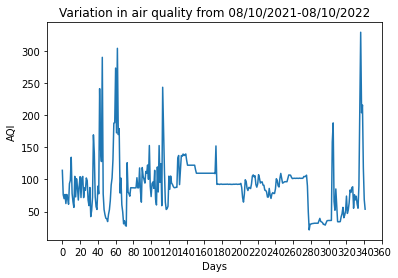

In [13]:
#Visualize the data.
import numpy as np
l1=[]
for i in range(df3.shape[0]):
    l1.append(quality(i,df3))
plt.plot(df3['To Date'],l1)
plt.xticks(ticks=np.arange(0,370,20),labels=[str(x) for x in np.arange(0,370,20)])
plt.xlabel('Days')
plt.ylabel('AQI')
plt.title('Variation in air quality from 08/10/2021-08/10/2022')
plt.show()

In [14]:
#Prepare a dataframe for the deep learning model
dataframe=pd.DataFrame({'AQI':l1})
dataframe

,AQI
0,114.283544
1,76.044444
2,70.055556
3,76.588889
4,62.433333
...,...
337,204.190000
338,216.270000
339,117.743624
340,68.660000


###The following cell is responsible for the main part of this project: the prediction. 
###We prepare a LSTM deep learning model using tensorflow keras. Special thanks to Mr. Jason Brownlee whose code I have used here. The link to his complete article with the code is given below
\
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

\

Epoch 1/100
227/227 - 3s - loss: 0.0322 - 3s/epoch - 13ms/step
Epoch 2/100
227/227 - 1s - loss: 0.0138 - 691ms/epoch - 3ms/step
Epoch 3/100
227/227 - 0s - loss: 0.0136 - 410ms/epoch - 2ms/step
Epoch 4/100
227/227 - 1s - loss: 0.0133 - 879ms/epoch - 4ms/step
Epoch 5/100
227/227 - 0s - loss: 0.0131 - 392ms/epoch - 2ms/step
Epoch 6/100
227/227 - 0s - loss: 0.0129 - 362ms/epoch - 2ms/step
Epoch 7/100
227/227 - 0s - loss: 0.0126 - 396ms/epoch - 2ms/step
Epoch 8/100
227/227 - 0s - loss: 0.0126 - 391ms/epoch - 2ms/step
Epoch 9/100
227/227 - 0s - loss: 0.0124 - 399ms/epoch - 2ms/step
Epoch 10/100
227/227 - 0s - loss: 0.0122 - 398ms/epoch - 2ms/step
Epoch 11/100
227/227 - 0s - loss: 0.0120 - 356ms/epoch - 2ms/step
Epoch 12/100
227/227 - 0s - loss: 0.0119 - 355ms/epoch - 2ms/step
Epoch 13/100
227/227 - 0s - loss: 0.0118 - 376ms/epoch - 2ms/step
Epoch 14/100
227/227 - 0s - loss: 0.0118 - 381ms/epoch - 2ms/step
Epoch 15/100
227/227 - 0s - loss: 0.0117 - 398ms/epoch - 2ms/step
Epoch 16/100
227/227 

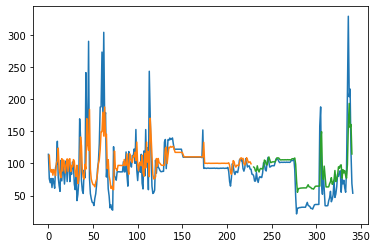

In [15]:
# LSTM for international airline passengers problem with regression framing
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

###The following cells makes use of pollution data on days following 8th October 2022 to check the accuracy of the model.

In [16]:
###Prepare another dataframe based on the data following 8th October 2022 to check the accuracy of the model.
dff=pd.read_excel('https://raw.githubusercontent.com/TXH2020/MainRepo/main/Projects/Air%20Quality/site_16220221013184812.xlsx',na_values=['None'],engine='openpyxl',skiprows=16)
pos=dff[dff['From Date']==dff['From Date'][0]].index[1]
df11=dff.iloc[:pos-5]
df22=dff.iloc[pos:]
df22.rename(columns={'PM2.5':'Ozone'},inplace=True)
df22.reset_index(inplace=True)
df22.drop(columns=['PM10','NO2','SO2','CO','From Date','To Date','index'],inplace=True)
df33=pd.concat([df11,df22],axis=1)
lj=[]
for i in range(df33.shape[0]):
    if(list(df33.iloc[i].isna()).count(True)==6):
        lj.append(i)
df33.drop(lj,inplace=True)
df33.fillna(value=0,inplace=True)
df33.reset_index(inplace=True)
df33.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


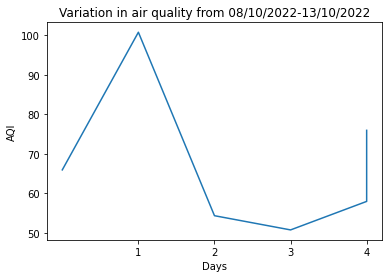

In [20]:
#Visualize the data from 8/10/2022 to 13/10/2022
l11=[]
for i in range(df33.shape[0]):
    l11.append(quality(i,df33))
plt.plot(df33['To Date'],l11)
plt.xticks(ticks=np.arange(1,5),labels=[str(x) for x in np.arange(1,5)])
plt.xlabel('Days')
plt.ylabel('AQI')
plt.title('Variation in air quality from 08/10/2022-13/10/2022')
plt.show()

In [21]:
#Prepare dataframe for prediction by model
dataframe1=pd.DataFrame({'AQI':l11})
dataframe1

,AQI
0,65.96
1,100.72
2,54.39
3,50.80
4,58.00
5,75.95


In [22]:
#Perform prediction
dataset1 = dataframe1.values
dataset1 = dataset1.astype('float32')
dataset1 = scaler.fit_transform(dataset1)
test1X, test1Y = create_dataset(dataset1, look_back)
test1X = np.reshape(test1X, (test1X.shape[0], 1, test1X.shape[1]))
testPredict1 = model.predict(test1X)
testPredict1 = scaler.inverse_transform(testPredict1)
test1Y = scaler.inverse_transform([test1Y])
test1Score = np.sqrt(mean_squared_error(test1Y[0], testPredict1[:,0]))
print('Test Score: %.2f RMSE' % (test1Score))

1/1 [==============================] - 0s 17ms/step
Test Score: 21.70 RMSE


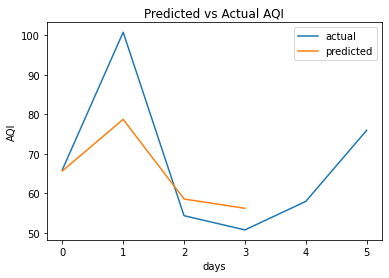

In [24]:
#Visualizing prediction.
testPredictPlot1 = np.empty_like(dataset1)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[0:len(dataset1)-2, :] = testPredict1
plt.plot(scaler.inverse_transform(dataset1),label='actual')
plt.plot(testPredictPlot1,label='predicted')
plt.legend()
plt.xlabel('days')
plt.ylabel('AQI')
plt.title('Predicted vs Actual AQI')
plt.show()

In [25]:
#Comparing actual and the predicted values.
print("Predicted\tActual")
for i in range(len(testPredict1)):
  print(testPredict1[i][0],'\t',testY[0][i])

Predicted	Actual
65.68646 	 80.57000625569222
78.71971 	 72.53999733213126
58.605907 	 72.56999705614484
56.261715 	 86.02655219363207
